# Importaciones

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [304]:
# Origen: https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond
df_diamonds = pd.read_csv('diamonds.csv')


# Observaciones iniciales

In [305]:
df_diamonds.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [306]:
# Adaptamos los nombres de las columnas para que sean legibles y borramos la primera porque no sirve

df_diamonds = df_diamonds.drop(columns='Unnamed: 0')

df_diamonds = df_diamonds.rename(columns={'carat': 'weight (carat)',
                                                'cut': 'cut quality',
                                                'color': 'color quality',
                                                'clarity': 'clarity quality', # Fuente: https://4cs.gia.edu/en-us/diamond-clarity/
                                                'depth': 'depth (percentage)', # Medida de la altura del diamante (distancia entre la punta y la parte plana) en relación a su anchura. Fuente: https://www.withclarity.com/education/diamond-education/diamond-cut/what-is-diamond-depth-or-diamond-education
                                                'table': 'table (percentage)', # Medida de la parte plana del diamante en relación a su anchura. Fuente: https://www.brilliance.com/education/diamonds/depth-table
                                                'price': 'price (dollars)',
                                                'x': 'lenght (millimeters)',
                                                'y': 'width (millimeters)',
                                                'z': 'depth (millimeters)'
                                                }
                                )


In [307]:
df_diamonds.head()


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [308]:
# No hay valores nulos
df_diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weight (carat)        53940 non-null  float64
 1   cut quality           53940 non-null  object 
 2   color quality         53940 non-null  object 
 3   clarity quality       53940 non-null  object 
 4   depth (percentage)    53940 non-null  float64
 5   table (percentage)    53940 non-null  float64
 6   price (dollars)       53940 non-null  int64  
 7   lenght (millimeters)  53940 non-null  float64
 8   width (millimeters)   53940 non-null  float64
 9   depth (millimeters)   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [309]:
# No parece posible que haya diamantes con 0 milimetros de altura, anchura o profundidad. Habrá que revisarlo
df_diamonds.describe()


,weight (carat),depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [310]:
df_diamonds.describe(include='object')


,cut quality,color quality,clarity quality
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


# Desglose por columnas

## weight (carat)

In [312]:
df_diamonds['weight (carat)'].unique()


array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

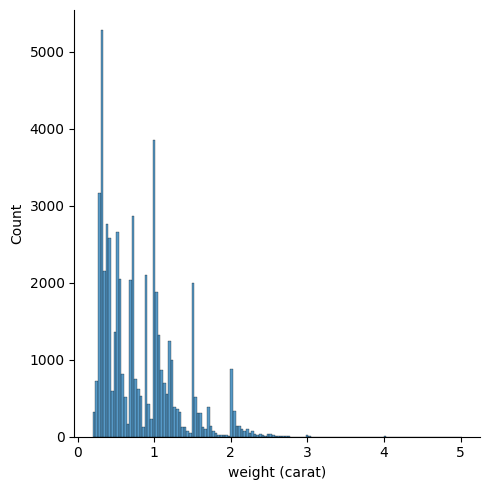

In [313]:
# Hay muy pocos diamantes que pesen más de 2 "carat" (quilates)
sns.displot(df_diamonds['weight (carat)'])
plt.show()


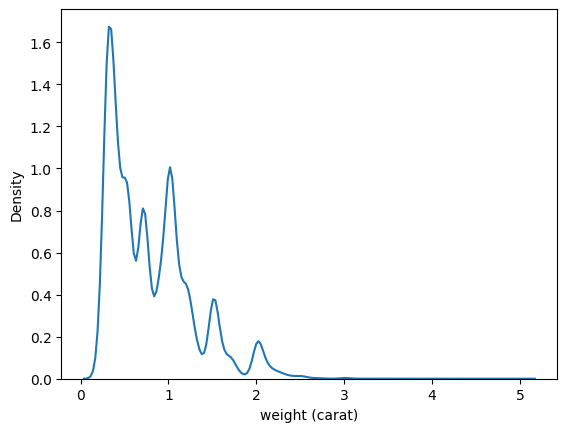

In [314]:
# Lo suavizamos con un gráfico de densidad. Hay una subida importante en el 1
sns.kdeplot(df_diamonds['weight (carat)'])
plt.show()


### Outliers

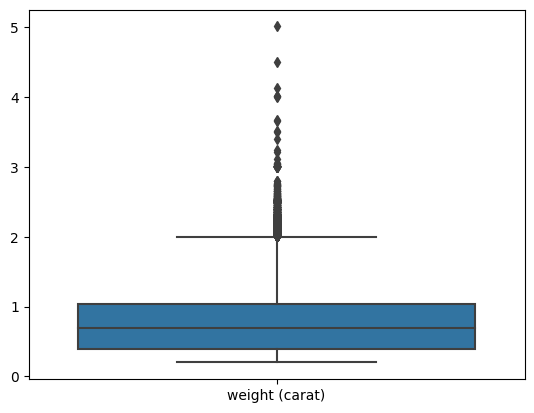

In [315]:
# Confirmamos lo visto con un boxplot
ax = sns.boxplot(df_diamonds['weight (carat)'])
ax.set_xticklabels(['weight (carat)'])
plt.show()


## cut quality

In [316]:
# No es numérica, habrá que transformarla. 
cut_uniques = list(df_diamonds['cut quality'].unique())
cut_uniques


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [317]:
very_good = cut_uniques[3]
cut_uniques.remove(very_good)
cut_uniques.insert(2, very_good)

for index, value in (enumerate(reversed(cut_uniques))):
    df_diamonds.loc[df_diamonds['cut quality'] == value, 'cut quality'] = index
    print(index, value)


0 Fair
1 Good
2 Very Good
3 Premium
4 Ideal


In [318]:
df_diamonds['cut quality'].unique()


array([4, 3, 1, 2, 0], dtype=object)

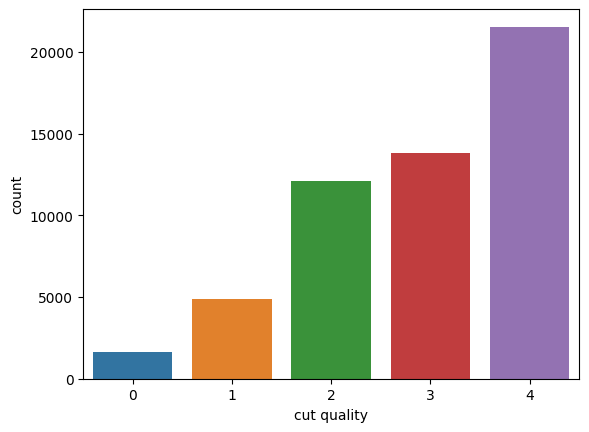

In [319]:
# Están bastente repartidos, aunque hay menos de categoría "Good" (1) o inferior
sns.countplot(x=df_diamonds['cut quality'])
plt.show()


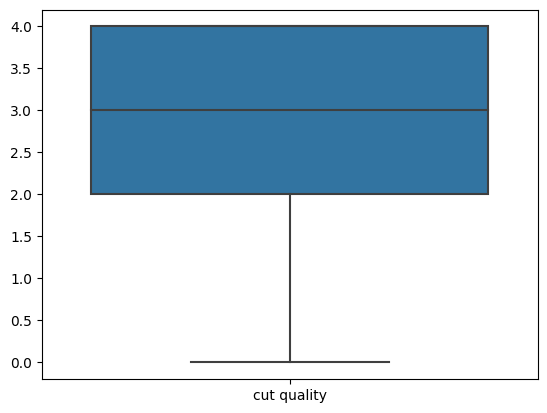

In [320]:
# En efecto, no hay "outliers"
ax = sns.boxplot(df_diamonds['cut quality'])
ax.set_xticklabels(['cut quality'])
plt.show()


## color quality

In [321]:
color_uniques = list(df_diamonds['color quality'].unique())
color_uniques.sort(reverse=True)
color_uniques


['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [322]:
# Similar al anterior, hay que pasar los valores a numéricos (J es la peor calidad, y D es la mejor)
for index, value in enumerate(color_uniques):
    df_diamonds.loc[df_diamonds['color quality'] == value, 'color quality'] = index
    print(index, value)


0 J
1 I
2 H
3 G
4 F
5 E
6 D


In [323]:
df_diamonds['color quality'].unique()


array([5, 1, 0, 2, 4, 3, 6], dtype=object)

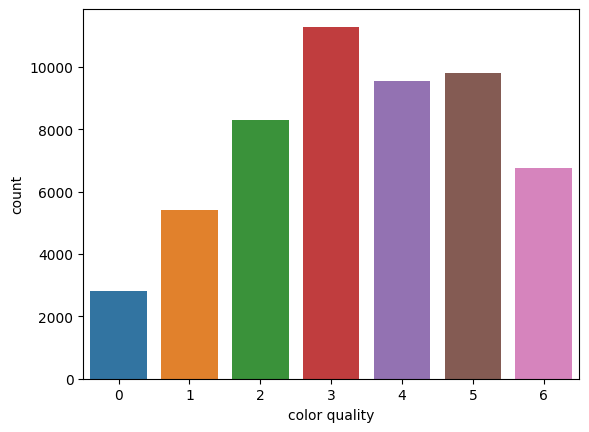

In [324]:
# Repartidos, si bien pocos de calidad J (0)
sns.countplot(x=df_diamonds['color quality'])
plt.show()


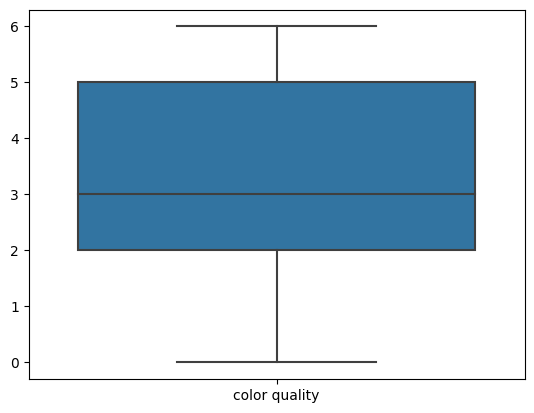

In [325]:
# Sin "outliers"
ax = sns.boxplot(df_diamonds['color quality'])
ax.set_xticklabels(['color quality'])
plt.show()


## clarity quality

In [326]:
# Hay que buscar a qué nivel de calidad corresponde cada valor y numerarlos
df_diamonds['clarity quality'].unique()


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [327]:
# Fuente: https://www.77diamonds.com/es/grados-de-pureza-del-diamante
df_diamonds['clarity quality'] = df_diamonds['clarity quality'].apply(lambda x: 0 if x == 'I1'
                                                                        else 1 if x == 'SI2'
                                                                        else 2 if x == 'SI1'
                                                                        else 3 if x == 'VS2'
                                                                        else 4 if x == 'VS1'
                                                                        else 5 if x == 'VVS2'
                                                                        else 6 if x == 'VVS1'
                                                                        else 7
                                                                        )

df_diamonds['clarity quality'].unique()


array([1, 2, 4, 3, 5, 6, 0, 7], dtype=int64)

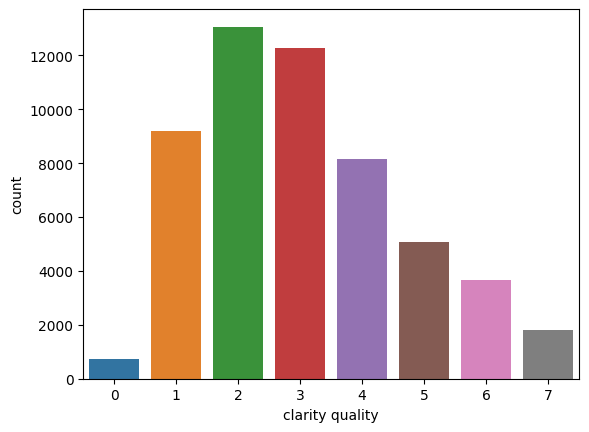

In [328]:
# Tal como indica la fuente, los diamantes de máxima calidad son muy raros. Hay menos, todavía, de la peor calidad
sns.countplot(x=df_diamonds['clarity quality'])
plt.show()


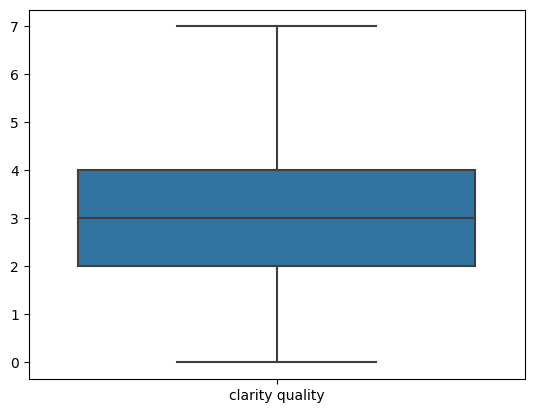

In [329]:
# Con todo, no hay "outliers"
ax = sns.boxplot(df_diamonds['clarity quality'])
ax.set_xticklabels(['clarity quality'])
plt.show()


## depth (percentage)

In [330]:
df_diamonds['depth (percentage)'].unique()


array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

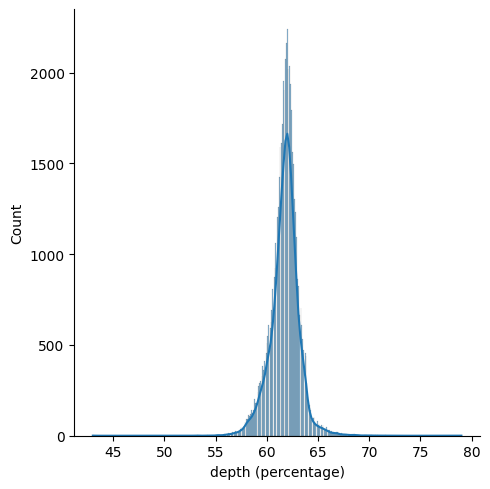

In [331]:
# Si no fuera porque el grueso de los números se encuentra en el centro, se asemejaría bastante a una distribución normal
sns.displot(df_diamonds['depth (percentage)'], kde=True)
plt.show()


### Outliers

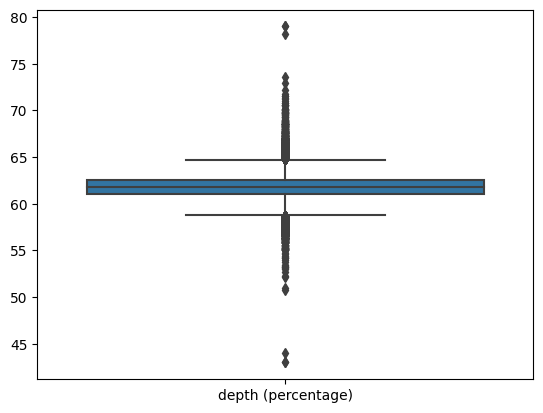

In [332]:
# A consecuencia de ello, hay muchos "outliers2
ax = sns.boxplot(df_diamonds['depth (percentage)'])
ax.set_xticklabels(['depth (percentage)'])
plt.show()


## table (percentage)

In [333]:
df_diamonds['table (percentage)'].unique()


array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

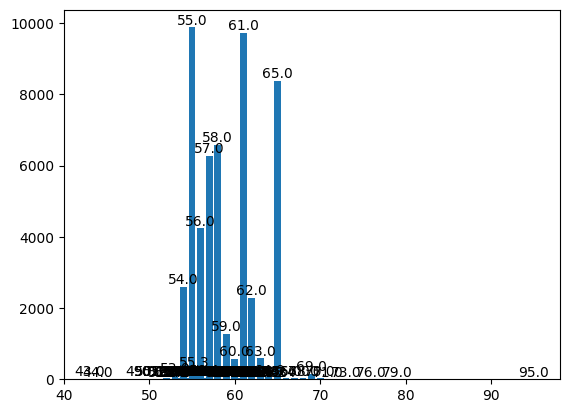

In [334]:
# Vemos que la inmensa mayoría se encuentran entre 50% y 65%, con números distintos, y que hay unos pocos valores que se repiten mucho
# Detectamos también un "outlier" flagrante del 95%
barplot = plt.bar(x=df_diamonds['table (percentage)'].unique(), height=df_diamonds['table (percentage)'].value_counts())
plt.bar_label(barplot, labels=df_diamonds['table (percentage)'].unique(), label_type='edge')
plt.show()


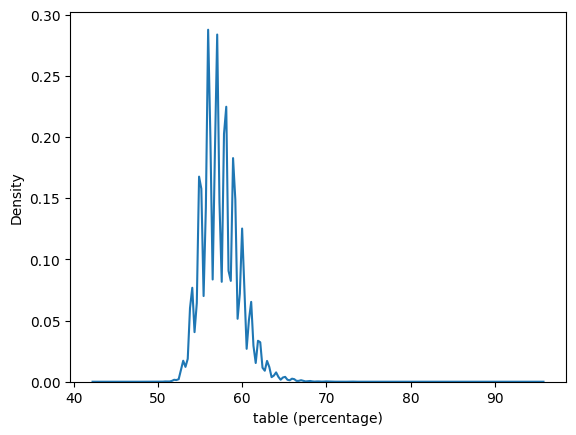

In [335]:
# Lo suavizamos con un gráfico de densidad para clarificar esa tendencia
sns.kdeplot(df_diamonds['table (percentage)'])
plt.show()


### Outliers

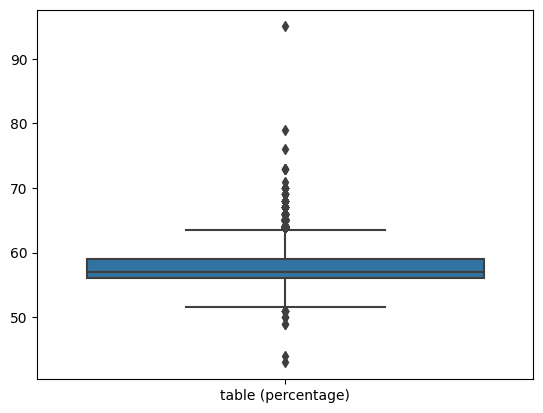

In [336]:
# Como es de preveer hay muchos "outliers", sobre todo por la parte superior
ax = sns.boxplot(df_diamonds['table (percentage)'])
ax.set_xticklabels(['table (percentage)'])
plt.show()


## price (dollars)

In [337]:
# Esta es la columna "target"
df_diamonds['price (dollars)'].unique()


array([ 326,  327,  334, ..., 2753, 2755, 2756], dtype=int64)

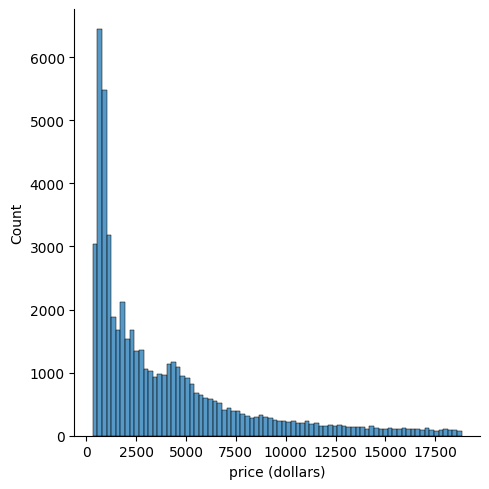

In [338]:
# Hay muchos diamantes con un precio "asequible", y cada vez menos a medida que se encarece
sns.displot(df_diamonds['price (dollars)'])
plt.show()


## lenght (millimeters)

In [339]:
df_diamonds['lenght (millimeters)'].unique()


array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

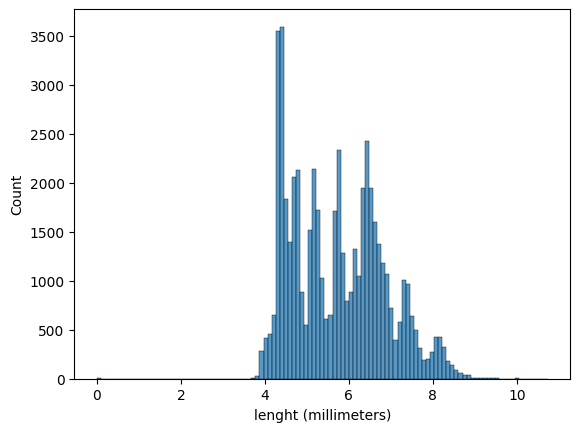

In [340]:
# Hay muchos valores únicos, así que usamos un histograma
# Claramente ese valor cercano a cero es un "outlier"
# Hay, además, unos pocos valores muy altos, cercanos a 10
sns.histplot(df_diamonds['lenght (millimeters)'])
plt.show()


In [341]:
# Si miramos esos ceros, vemos que, salvo uno, tampoco tenen width ni depth
df_diamonds[df_diamonds['lenght (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
11182,1.07,4,4,1,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,2,2,3,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,0,3,4,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,4,3,3,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,3,6,6,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,3,2,1,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,1,4,1,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,1,4,1,64.1,60.0,2130,0.0,0.00,0.0


In [342]:
# Como esas tres variables son las que más influyen en el precio, eliminamos directamente los diamantes que solo tienen ceros para mayor precisión
df_diamonds = df_diamonds.drop(df_diamonds[(df_diamonds['lenght (millimeters)'] == 0) 
                                & (df_diamonds['width (millimeters)'] == 0)
                                & (df_diamonds['depth (millimeters)'] == 0)
                                            ].index
                                )

df_diamonds[df_diamonds['lenght (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
11182,1.07,4,4,1,61.6,56.0,4954,0.0,6.62,0.0


In [343]:
# En cuanto al restante, comprobamos la relación entre las columnas lenght y width
# Como los diamantes son más o menos circulares, a priori, los números son bastante similares
# Fuente: https://www.diamondonnet.com/knowledges/help?sword=Length%20To%20Width%20Ratio
df_diamonds[['lenght (millimeters)','width (millimeters)']].head()


,lenght (millimeters),width (millimeters)
0,3.95,3.98
1,3.89,3.84
2,4.05,4.07
3,4.20,4.23
4,4.34,4.35


In [344]:
# Tanto es así que, excluyendo ese cero y redondeados, son exactamente iguales todos
all(df_diamonds['lenght (millimeters)'].drop(11182).apply(lambda x: round(x))) == all(df_diamonds['width (millimeters)'].drop(11182).apply(lambda x: round(x)))


True

In [345]:
# Por tanto, asignamos a ese cero la cifra correspondiente de la columna width
df_diamonds.loc[df_diamonds.index == 11182, 'lenght (millimeters)'] = 6.62


### Outliers

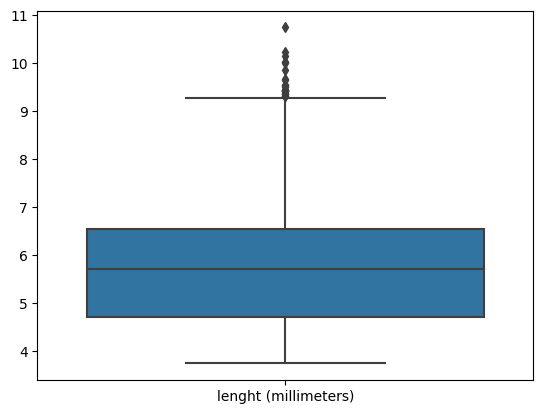

In [346]:
# Comprobamos que ya no hay "outliers" por debajo de la mediana
ax = sns.boxplot(df_diamonds['lenght (millimeters)'])
ax.set_xticklabels(['lenght (millimeters)'])
plt.show()


## width (millimeters)

In [347]:
df_diamonds['width (millimeters)'].unique()


array([ 3.98,  3.84,  4.07,  4.23,  4.35,  3.96,  4.11,  3.78,  4.05,
        4.28,  3.9 ,  4.37,  3.75,  4.42,  4.34,  4.29,  4.26,  4.27,
        4.3 ,  3.92,  4.43,  4.47,  4.01,  3.94,  3.97,  3.99,  4.03,
        4.06,  4.08,  3.85,  4.31,  4.16,  4.51,  4.5 ,  4.55,  4.02,
        4.24,  4.38,  3.95,  4.48,  3.89,  3.88,  4.33,  4.32,  4.59,
        4.84,  4.22,  4.  ,  4.25,  4.13,  4.09,  4.04,  4.12,  4.67,
        5.72,  6.33,  5.67,  5.73,  5.85,  5.9 ,  5.76,  5.95,  5.78,
        5.93,  5.75,  5.96,  5.79,  5.87,  5.8 ,  5.81,  6.11,  5.43,
        6.  ,  5.84,  6.12,  5.82,  5.74,  5.94,  6.07,  5.69,  5.83,
        5.61,  5.53,  5.58,  5.59,  5.97,  6.09,  5.99,  5.86,  5.68,
        5.65,  5.55,  5.77,  5.91,  5.56,  5.89,  5.92,  6.03,  5.44,
        5.37,  5.88,  6.9 ,  5.62,  5.27,  5.26,  5.7 ,  5.64,  5.63,
        5.71,  5.51,  5.22,  6.36,  5.54,  5.66,  6.2 ,  5.18,  5.15,
        6.1 ,  6.21,  6.22,  6.45,  6.01,  5.3 ,  5.41,  5.52,  6.27,
        6.05,  6.06,

### Outliers

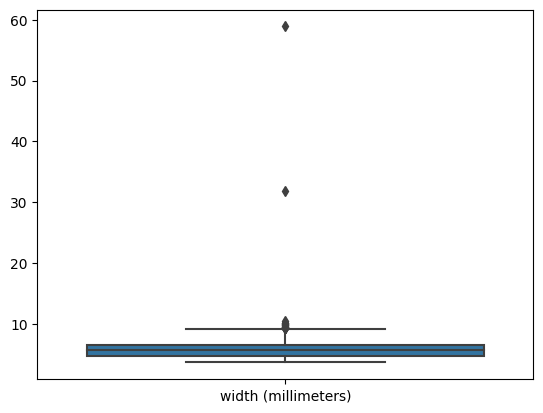

In [348]:
# En este caso están extremadamente concentrados, si bien hay unos pocos valores, poquísimos, superiores a 10
ax = sns.boxplot(df_diamonds['width (millimeters)'])
ax.set_xticklabels(['width (millimeters)'])
plt.show()


In [349]:
# Con los que hemos eliminado antes en "lenght", ya no quedan ceros tampoco en "width"
df_diamonds[df_diamonds['width (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)


## depth (millimeters)

In [350]:
df_diamonds['depth (millimeters)'].unique()


array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,

In [351]:
# Empezamos por comprobar los ceros. Hay bastantes
df_diamonds[df_diamonds['depth (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
2207,1.00,3,3,1,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,3,2,0,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,3,3,1,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,3,4,1,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,1,3,0,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,4,4,1,61.6,56.0,4954,6.62,6.62,0.0
13601,1.15,4,3,3,59.2,56.0,5564,6.88,6.83,0.0
24394,2.18,3,2,1,59.4,61.0,12631,8.49,8.45,0.0
26123,2.25,3,1,2,61.3,58.0,15397,8.52,8.42,0.0
27112,2.20,3,2,2,61.2,59.0,17265,8.42,8.37,0.0


In [352]:
# Sabemos que el "depth (percentage)" se obtiene de dividir su altura total ("depth") por el diámetro
# Como tenemos el "lenght" y el "width", el diámetro se obtiene con la media de esas dos cifras
# Por tanto, podemos resolver esos ceros con una operación

df_diamonds.loc[df_diamonds['depth (millimeters)'] == 0, 'depth (millimeters)'] = df_diamonds['depth (percentage)'] / 100 * (df_diamonds['lenght (millimeters)']+df_diamonds['width (millimeters)']) / 2

df_diamonds[df_diamonds['depth (millimeters)'] == 0]


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)


### Outliers

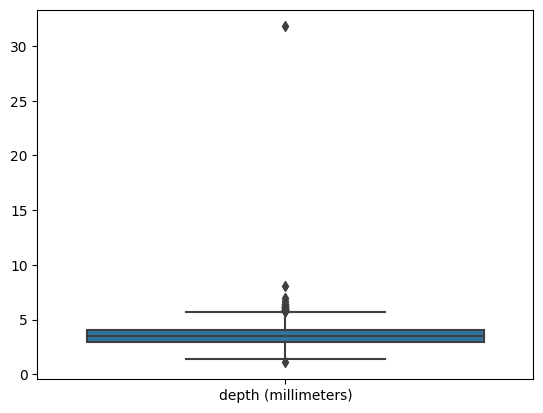

In [353]:
# Vemos que ya no hay ceros, que los valores están concentrados y que hay varios "outliers"; uno de ellos, muy alto
ax = sns.boxplot(df_diamonds['depth (millimeters)'])
ax.set_xticklabels(['depth (millimeters)'])
plt.show()


# Desglose por múltiples variables

In [354]:
df_diamonds.head()


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [355]:
# La cuestión de los ceros ha quedado resuelta
df_diamonds.describe()


,weight (carat),clarity quality,depth (percentage),table (percentage),price (dollars),lenght (millimeters),width (millimeters),depth (millimeters)
count,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000
mean,0.797884,3.051063,61.749333,57.457002,3932.155026,5.732024,5.735270,3.540275
std,0.473983,1.647118,1.432501,2.234052,3988.700283,1.119666,1.140339,0.702664
min,0.200000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Correlación

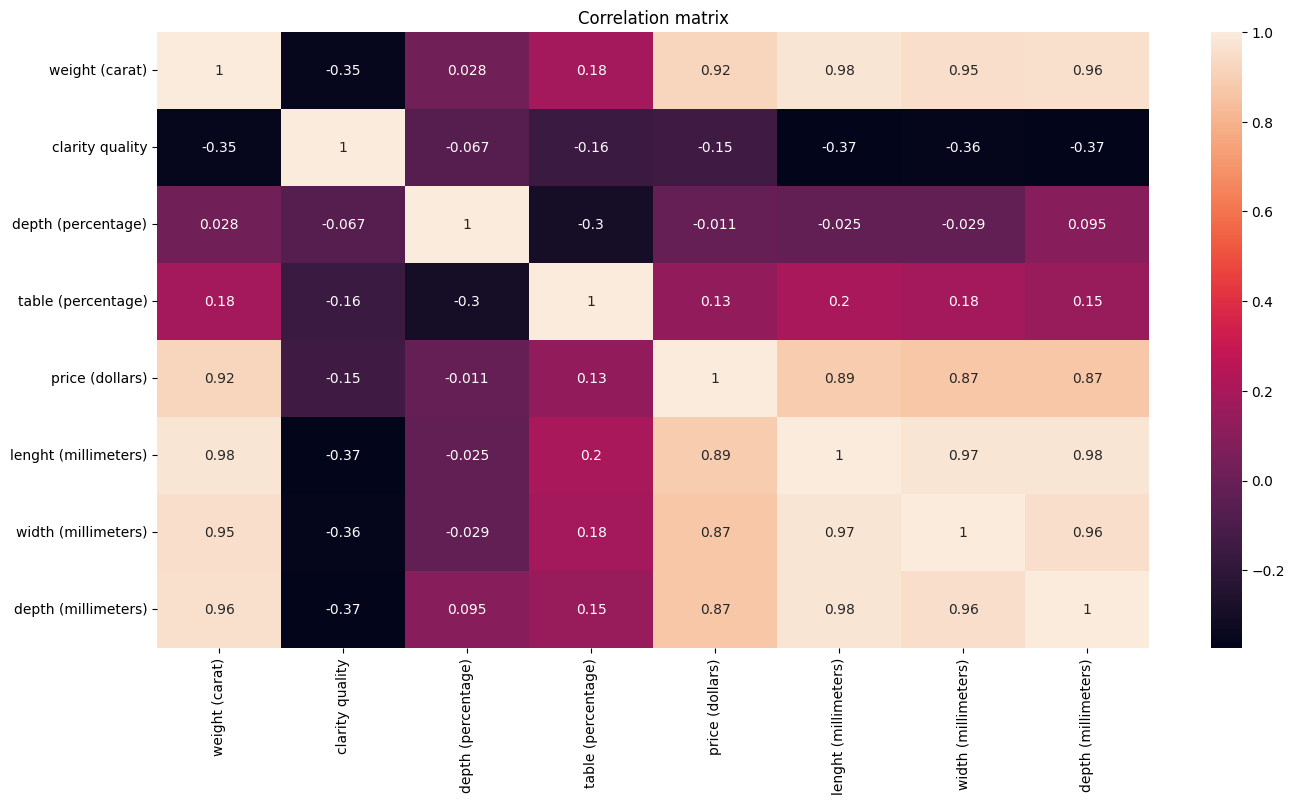

In [356]:
# Parece que lo que más influye en el precio son el tamaño ("lenght", "width" y "depth") y el peso ("weight") del diamante
# Respecto a las medidas específicas para diamantes ("depth" y "table" en %), salta a la vista que mejorar en una suele requerir sacrificar la otra
# Eso a se debe que la "table" (parte plana superior del diamante) es más grande en los diamantes más anchos, y no en los de mayor altura ("depth")
# Asimismo, a mayor tamaño se pierde claridad (probablemente porque, con una mayor superficie, hay más probabilidad de imperfecciones)
plt.rc("figure", figsize=(16, 8))

corr = df_diamonds.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix')
plt.show()


In [ ]:
plt.rc("figure", figsize=(6.4, 4.8))
